# Week 4

## Objectives so far
* Read more about Pyomo and other tools that might work for multi-objective optimization in Python
* Read and summarize multiple multi-objective optimization papers for Paloma
* ~~Prepare 2 architectures (one low-data and one large-data and present them in June 27)~~
* ~~Prepare a presentation for literature review in June 30~~

## July 5
Today I decided to read and check the papers presented by Neil in the last meeting as these represent the latest information available that will probably be the most useful for our project. 

>**Title:** Representing Polymers as Periodic Graphs with Learned Descriptors for Accurate Polymer Property Predictions
>
>**Author(s):** Evan R. Antoniuk, Peggy Li, Bhavya Kailkhura, Anna M. Hiszpanski
>
>**Link:** [PDF Article](https://www.google.com)
>
>**Important Points:**
>* To be written

>**Title:** Reinforcement Learning for Molecular Design Guided by Quantum Mechanics
>
>**Author(s):** Gregor N. C. Simm, Robert Pinsler, José Miguel Hernández-Lobato
>
>**Link:** [PDF Article](https://www.facebook.com)
>
>**Important Points:**
>* To be written

In addition to this, I will install the PI1M library, and take some notes regarding how is it like.

<div class="alert alert-block alert-info">
<b>PI1M: A ~1 million polymer database</b>
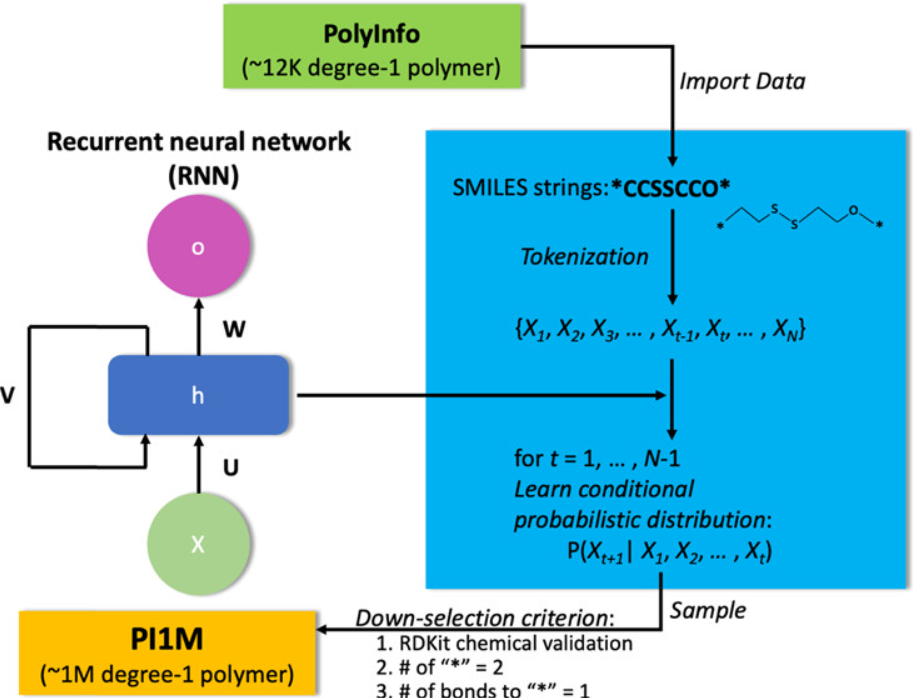</img>
</div>


## July 6

>**Title:** Reinforcement Learning for Molecular Design Guided by Quantum Mechanics
>
>**Author(s):** Gregor N. C. Simm, Robert Pinsler, José Miguel Hernández-Lobato
>
>**Link:** [PDF Article](https://nbviewer.org/github/LouisTheLuis/MCSC-Summer-2022/blob/master/Summaries/Reinforcement_Learning_for_Molecular_Design_Guided_By_Quantum_Mechanics.pdf)
>
>**Important Points:**
>* 